In [1]:
import torch
import pickle
import cv2
from matplotlib import pyplot as plt
import numpy as np
from src.trajectories import TrajectoriesDataset, load_trajectories
from torch.utils.data import DataLoader


In [2]:
dataset = load_trajectories('trajectories/ep5000_dur47.40_ret-0.12/trajectories/0.01K.pt')

print('Episodes:', len(dataset))
print('Observation shape (episode):', dataset[0][0].shape, dataset[0][0].dtype, sys.getsizeof(dataset[0][0].storage()))
print('Action shape (episode):', dataset[0][1].shape, dataset[0][1].dtype, sys.getsizeof(dataset[0][1].storage()))
print('Reward shape (episode):', dataset[0][2].shape, dataset[0][2].dtype, sys.getsizeof(dataset[0][2].storage()))

AttributeError: Can't get attribute 'TrajectoriesDataset' on <module 'trajectories' (namespace)>

torch.Size([10, 50, 24, 24, 3]) torch.uint8
torch.Size([10, 50])


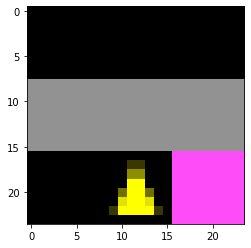

In [40]:
# debug
loader = DataLoader(dataset, batch_size=32)
episode = 3

for i, batch in enumerate(loader):
    observations, actions, reward = batch
    print(observations.shape, observations.dtype)
    returns = torch.ones_like(reward) * 0
    sums = torch.sum(reward, axis=1)

    returns += sums[:, None]
    returns += 1
    print(returns.shape)
    plt.imshow(observations[episode, 49, :, :, :])
    plt.show()
    break

In [27]:
returns

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1,